# Basic Model

## Setup

In [1]:
import torch
from torchvision import datasets, transforms 
from sklearn.metrics import classification_report

In [2]:
%run setup.ipynb

## Model

In [5]:
# Load ResNet50
untrained_model = load_and_prep_resnet50()
optimizer = torch.optim.SGD(untrained_model.parameters(), lr=0.001, momentum=0.9)

## Training

In [6]:
trained_model, info = train_model(model=untrained_model, optimizer=optimizer, num_epoch=50, train=dataloader_train)

Epoch 1/50
----------
Train Loss: 1.8192 Acc: 0.4479
Val Loss: 1.6480 Acc: 0.7596
Epoch time 4m 37s
----------

Epoch 2/50
----------
Train Loss: 1.5278 Acc: 0.8204
Val Loss: 1.3938 Acc: 0.8558
Epoch time 4m 49s
----------

Epoch 3/50
----------
Train Loss: 1.2900 Acc: 0.8862
Val Loss: 1.1741 Acc: 0.8846
Epoch time 4m 50s
----------

Epoch 4/50
----------
Train Loss: 1.1078 Acc: 0.9210
Val Loss: 1.0117 Acc: 0.9135
Epoch time 4m 15s
----------

Epoch 5/50
----------
Train Loss: 0.9762 Acc: 0.9222
Val Loss: 0.9127 Acc: 0.9135
Epoch time 2m 37s
----------

Epoch 6/50
----------
Train Loss: 0.8812 Acc: 0.9389
Val Loss: 0.8072 Acc: 0.8942
Epoch time 2m 40s
----------

Epoch 7/50
----------
Train Loss: 0.7983 Acc: 0.9425
Val Loss: 0.7243 Acc: 0.9231
Epoch time 2m 41s
----------

Epoch 8/50
----------
Train Loss: 0.7157 Acc: 0.9509
Val Loss: 0.6966 Acc: 0.9038
Epoch time 2m 42s
----------

Epoch 9/50
----------
Train Loss: 0.6713 Acc: 0.9449
Val Loss: 0.6590 Acc: 0.9423
Epoch time 2m 37s
----

In [8]:
truel, predl = labels_and_predictions(dataloader_test, trained_model, device)

Accuracy 96.19047619047619
              precision    recall  f1-score   support

     blueTit       1.00      0.93      0.97        15
   chaffinch       0.94      1.00      0.97        15
     coalTit       0.83      1.00      0.91        15
   goldfinch       1.00      1.00      1.00        15
    greatTit       1.00      0.87      0.93        15
       robin       1.00      0.93      0.97        15
    starling       1.00      1.00      1.00        15

    accuracy                           0.96       105
   macro avg       0.97      0.96      0.96       105
weighted avg       0.97      0.96      0.96       105



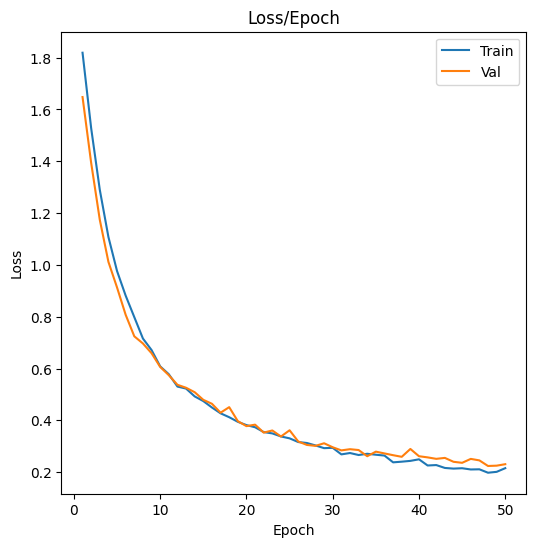

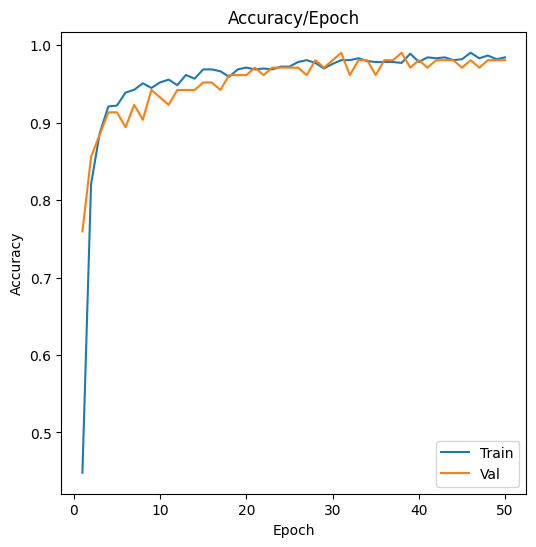

In [9]:
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))
print(classification_report(truel, predl, target_names=class_labels))
plot_loss(info["train_loss"], info["val_loss"], ["Train", "Val"])
plot_accuracies(info["train_acc"], info["val_acc"], ["Train", "Val"])


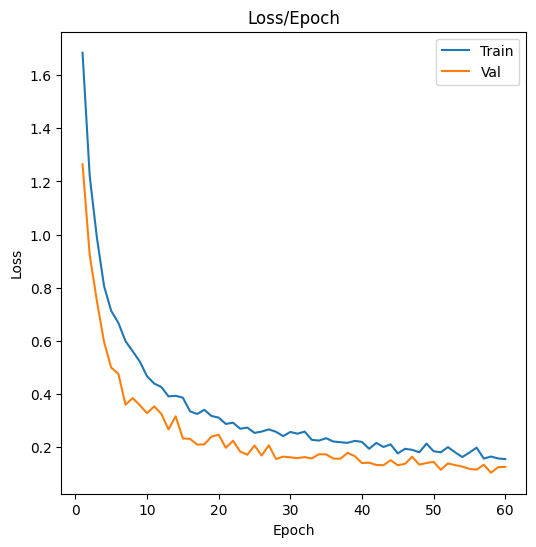

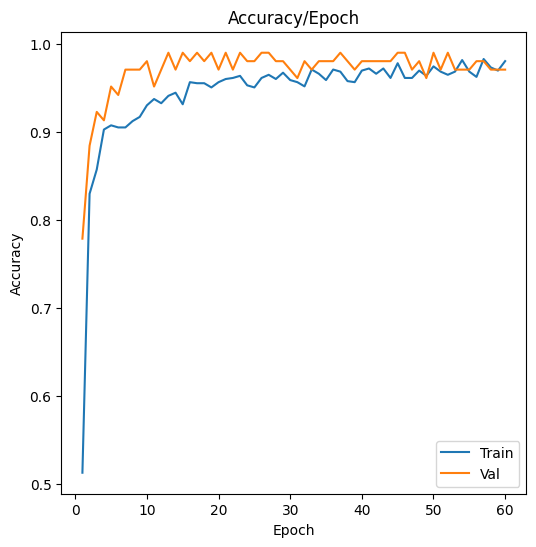

In [5]:
# Plot Loss
plot_loss(info["train_loss"], info["val_loss"], ["Train", "Val"])

# Plot Accuracy
plot_accuracies(info["train_acc"], info["val_acc"], ["Train", "Val"])

In [ ]:
unfreeze_layers(trained_model)
model, model_info = train_model(model=trained_model, optimizer=optimizer, num_epoch=60, train=dataloader_train)

Epoch 1/60
----------
Train Loss: 0.2174 Acc: 0.9401
Val Loss: 0.0800 Acc: 0.9808
Epoch time 1m 53s
----------

Epoch 2/60
----------
Train Loss: 0.0904 Acc: 0.9808
Val Loss: 0.1657 Acc: 0.9808
Epoch time 1m 54s
----------

Epoch 3/60
----------
Train Loss: 0.0637 Acc: 0.9832
Val Loss: 0.1281 Acc: 0.9808
Epoch time 1m 54s
----------

Epoch 4/60
----------
Train Loss: 0.0370 Acc: 0.9952
Val Loss: 0.1874 Acc: 0.9904
Epoch time 1m 54s
----------

Epoch 5/60
----------
Train Loss: 0.0291 Acc: 0.9952
Val Loss: 0.1067 Acc: 0.9904
Epoch time 1m 53s
----------

Epoch 6/60
----------
Train Loss: 0.0315 Acc: 0.9964
Val Loss: 0.0767 Acc: 0.9808
Epoch time 1m 53s
----------

Epoch 7/60
----------
Train Loss: 0.0214 Acc: 0.9964
Val Loss: 0.1332 Acc: 0.9808
Epoch time 1m 53s
----------

Epoch 8/60
----------
Train Loss: 0.0379 Acc: 0.9844
Val Loss: 0.1394 Acc: 0.9904
Epoch time 1m 54s
----------

Epoch 9/60
----------
Train Loss: 0.0185 Acc: 0.9964
Val Loss: 0.0914 Acc: 0.9904
Epoch time 1m 55s
----

In [ ]:
# torch.save({"basic_model": model.state_dict(), "bm_info": model_info, "freeze_bm_info": info},"basicModel_60.tar")

## Results

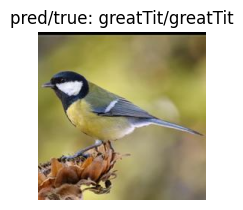

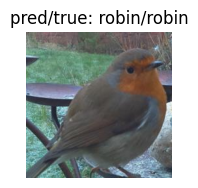

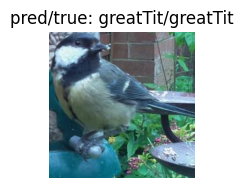

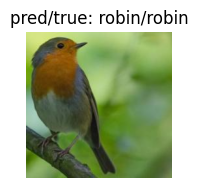

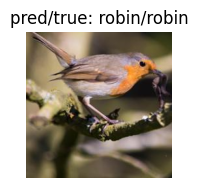

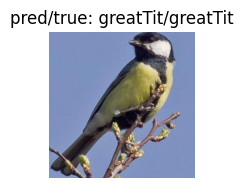

In [8]:
visualize_model(model, dataloader_validation, class_labels, device)

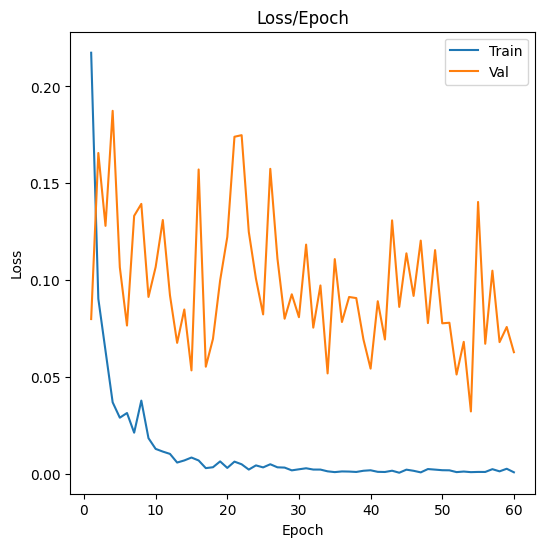

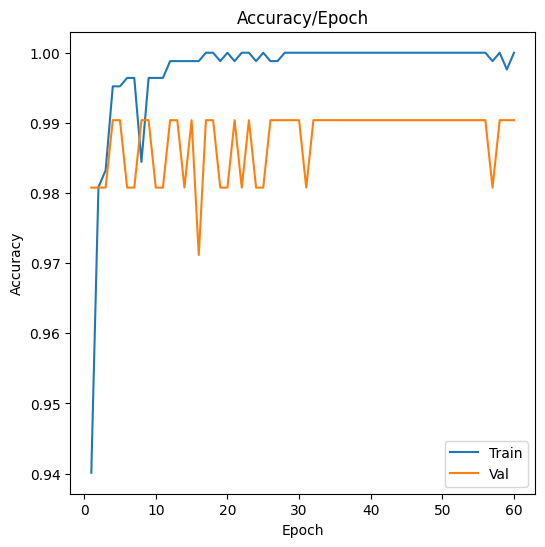

In [9]:
# Plot Loss
plot_loss(model_info["train_loss"], model_info["val_loss"], ["Train", "Val"])

# Plot Accuracy
plot_accuracies(model_info["train_acc"], model_info["val_acc"], ["Train", "Val"])

[[15  0  0  0  0  0  0]
 [ 1 14  0  0  0  0  0]
 [ 1  0 14  0  0  0  0]
 [ 0  0  0 15  0  0  0]
 [ 0  0  1  0 14  0  0]
 [ 0  0  0  0  0 15  0]
 [ 1  0  0  0  0  0 14]]
Accuracy 96.19047619047619


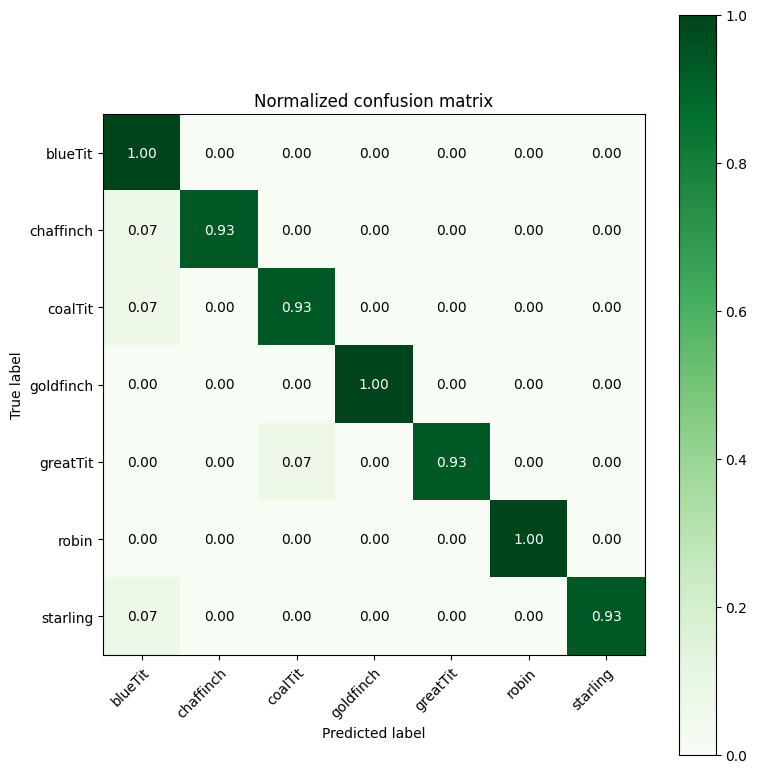

In [10]:
truel, predl = makeAll(dataloader_test, model, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))

In [11]:
print(classification_report(truel, predl, target_names=class_labels))

              precision    recall  f1-score   support

     blueTit       0.83      1.00      0.91        15
   chaffinch       1.00      0.93      0.97        15
     coalTit       0.93      0.93      0.93        15
   goldfinch       1.00      1.00      1.00        15
    greatTit       1.00      0.93      0.97        15
       robin       1.00      1.00      1.00        15
    starling       1.00      0.93      0.97        15

    accuracy                           0.96       105
   macro avg       0.97      0.96      0.96       105
weighted avg       0.97      0.96      0.96       105



# Test on Feeder

[[ 530   39   54   68 1161    8  218]
 [  63 2167  336  234  271   78  403]
 [  33   73 1080  159  261    2  238]
 [   8   30   40 1901    9    1   11]
 [ 126   10  140   29 1554   10  164]
 [  34  147    2   41   21  603  580]
 [  44    4  112   34   42   14 1892]]
Accuracy 64.50693016778301


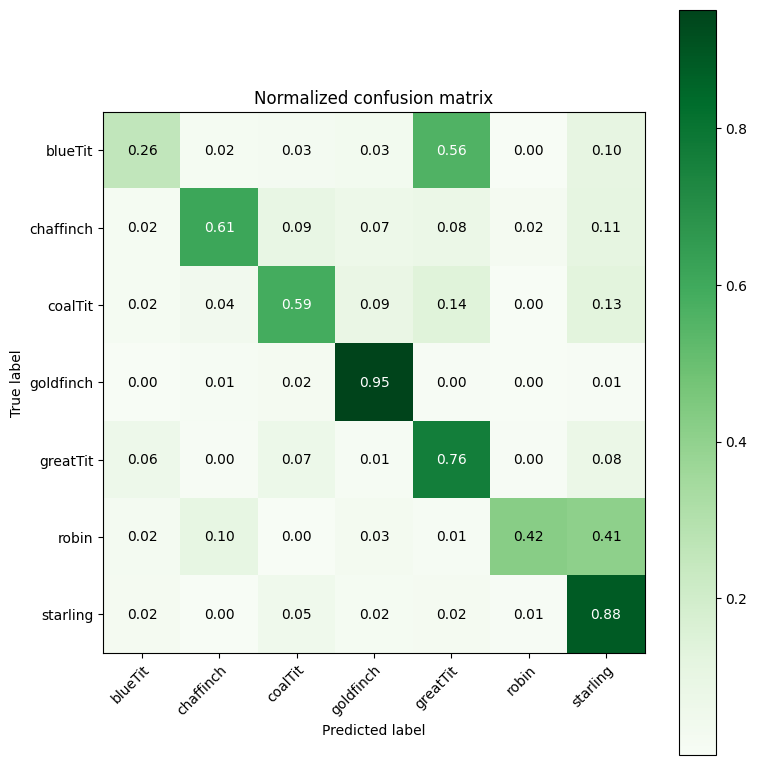

In [12]:
truel, predl = makeAll(dataloader_feeder, model, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))

In [13]:
print(classification_report(truel, predl, target_names=class_labels))

              precision    recall  f1-score   support

     blueTit       0.63      0.26      0.36      2078
   chaffinch       0.88      0.61      0.72      3552
     coalTit       0.61      0.59      0.60      1846
   goldfinch       0.77      0.95      0.85      2000
    greatTit       0.47      0.76      0.58      2033
       robin       0.84      0.42      0.56      1428
    starling       0.54      0.88      0.67      2142

    accuracy                           0.65     15079
   macro avg       0.68      0.64      0.62     15079
weighted avg       0.69      0.65      0.63     15079

